Họ tên: Võ Thành Nam

MSSV: 19120301

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [ ]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ParallelProgramming/HW2

/content/drive/MyDrive/ParallelProgramming/HW2


## Câu 1A

In [ ]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1

In [ ]:
!./HW2_P1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 512
Kernel time = 2.001376 ms, post-kernel time = 0.088832 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 512
Kernel time = 2.072352 ms, post-kernel time = 0.088768 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 512
Kernel time = 1.780896 ms, post-kernel time = 0.089312 ms
CORRECT :)


Ta thấy Kernel 3 có tốc độ nhanh nhất vì giải quyết được vấn đề warp bị phân kì của kernel 1 và bank conflict của kernel 2. Bộ nhớ của GPU thường được tổ chức thành các bank. Việc truy xuất cùng lúc các biến trong cùng bank sẽ không thể thực hiện song song mà sẽ thực hiện tuần tự, hiện tượng này gọi là bank conflict. Tuy nhiên, với kích thước mảng mặc định thì ta không thấy được sự ưu điểm về thời gian của kernel 2 so với kernel 1.

## Câu 1B


In [ ]:
!./HW2_P1 1024

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 1024
Kernel time = 2.705824 ms, post-kernel time = 0.048736 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 1024
Kernel time = 2.782624 ms, post-kernel time = 0.051808 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 1024
Kernel time = 2.292832 ms, post-kernel time = 0.047904 ms
CORRECT :)


In [ ]:
!./HW2_P1 512

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 512
Kernel time = 2.000896 ms, post-kernel time = 0.091808 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 512
Kernel time = 2.078528 ms, post-kernel time = 0.089344 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 512
Kernel time = 1.781664 ms, post-kernel time = 0.090368 ms
CORRECT :)


In [ ]:
!./HW2_P1 256

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 256
Kernel time = 1.655872 ms, post-kernel time = 0.166208 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 256
Kernel time = 1.682528 ms, post-kernel time = 0.185184 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 256
Kernel time = 1.493888 ms, post-kernel time = 0.193728 ms
CORRECT :)


In [ ]:
!./HW2_P1 128

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 131073, block size: 128
Kernel time = 1.467392 ms, post-kernel time = 0.354112 ms
CORRECT :)

Kernel 2
Grid size: 131073, block size: 128
Kernel time = 1.496960 ms, post-kernel time = 0.343008 ms
CORRECT :)

Kernel 3
Grid size: 131073, block size: 128
Kernel time = 1.325792 ms, post-kernel time = 0.349856 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 16385 | 1 | 100 | 2.705824 | 0.048736 | 2.75456
512 | 32769 | 2 | 100 | 2.000896 | 0.091808 | 2.092704
256 | 65537 | 4 | 100 | 1.655872 | 0.166208 | 1.82208
128 | 131073 | 8 | 100 | 1.467392 | 0.354112 | 1.821504

Cách tính 
- Num blocks / SM = $$\frac{\text{Max threads per SM}}{\text{Block size}}$$
- Occupancy = $$\lceil{\frac{\text{Threads per block}}{\text{Threads per warp}}\rceil} * \frac{\text{Active thread blocks per SM}}{\text{Max warps per SM}}$$
Ví dụ ta có Max threads per SM là 1024, như vậy với lần lượt block size là 1024, 512, 256, 128 thì Num_blocks/SM là 1,2,4,8. Occupancy của block size 1024 là 1024/32 *1/32 = 100%

Khi Block size giảm, nghĩa là số lượng tính toán trong mỗi block giảm và số lượng block thực hiện song song với nhau tăng lên, do đó ta thấy kernel time giảm. Tuy nhiên, việc này cũng gây ra hậu quả là kết quả trả về sẽ nhiều hơn, do mảng được chia vào các block để tính tổng nên càng nhiều block thì càng nhiều kết quả, và CPU sẽ phải thực hiện nhiều phép tính hơn, post-kernel time sẽ tăng. Với kernel 1, dựa theo bảng trên, kích thước block size là 128 là tối ưu nhất, vì tuy thời gian post-kernel tăng, nhưng điều đó không quá đáng kể so với lợi ích của việc song song hóa các phép tính trên GPU mang lại.

## Câu 2

In [ ]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

In [ ]:
!nvprof ./HW2_P2

n =  16777217

==1419== NVPROF is profiling process 1419, command: ./HW2_P2
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 18.587551 ms

CORRECT :)
==1419== Profiling application: ./HW2_P2
==1419== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   68.15%  12.622ms         2  6.3110ms  6.3016ms  6.3203ms  [CUDA memcpy HtoD]
                   27.53%  5.0981ms         1  5.0981ms  5.0981ms  5.0981ms  [CUDA memcpy DtoH]
                    4.33%  801.18us         1  801.18us  801.18us  801.18us  addVecKernel(int*, int*, int, int*)
      API calls:   92.93%  451.48ms         3  150.49ms  4.2915ms  408.74ms  cudaHostRegister
                    3.81%  18.507ms         2  9.2533ms  9.5750us  18.497ms  cudaEventSynchronize
                    2.04%  9.8893ms         3  3.2964ms  1.9188ms  5.5308ms  cudaHostUnregister
                    0.75%  3.6502ms         3  1.2167ms  242.50us  2.1

In [ ]:
!nvprof -o HW2_P2_1.nvvp -f ./HW2_P2

n =  16777217

==1430== NVPROF is profiling process 1430, command: ./HW2_P2
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 18.544031 ms

CORRECT :)
==1430== Generated result file: /content/drive/MyDrive/ParallelProgramming/HW2/HW2_P2_1.nvvp


In [ ]:
!nvprof ./HW2_P2 512 3

n =  16777217

==1441== NVPROF is profiling process 1441, command: ./HW2_P2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 15.190432 ms

CORRECT :)
==1441== Profiling application: ./HW2_P2 512 3
==1441== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   65.88%  13.107ms         6  2.1845ms  1.9539ms  2.4044ms  [CUDA memcpy HtoD]
                   29.81%  5.9307ms         3  1.9769ms  1.7035ms  2.1521ms  [CUDA memcpy DtoH]
                    4.31%  857.92us         3  285.97us  280.10us  295.49us  addVecKernel(int*, int*, int, int*)
      API calls:   88.58%  223.55ms         3  74.518ms  3.5850ms  198.86ms  cudaHostRegister
                    5.97%  15.076ms         2  7.5382ms  9.6710us  15.067ms  cudaEventSynchronize
                    3.86%  9.7531ms         3  3.2510ms  1.6597ms  4.8470ms  cudaHostUnregister
                    0.97%  2.4463ms         3  815.44us  2

In [ ]:
!nvprof -o HW2_P2_3.nvvp -f ./HW2_P2 512 3

n =  16777217

==1452== NVPROF is profiling process 1452, command: ./HW2_P2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 15.222944 ms

CORRECT :)
==1452== Generated result file: /content/drive/MyDrive/ParallelProgramming/HW2/HW2_P2_3.nvvp


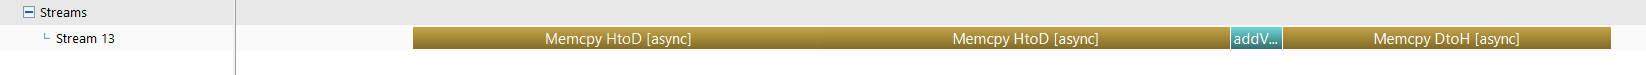

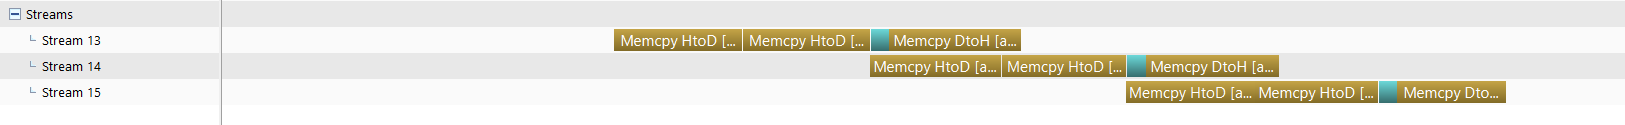